In [1]:
import sys
sys.path.insert(0, "../../python")

import os
from ionization import ionization
from ionization import adk
from propagation import propagation
from propagation import laser
from lens import profile
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate
from numpy.fft import fft, ifft, fft2, ifft2, fftfreq, fftshift

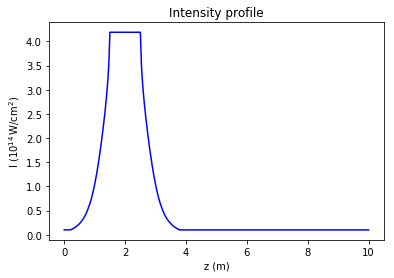

In [4]:
# Create the desired intensity profile
ion = {'atom' : ionization.H2,
       'tau' : 50,
       'type' : 'gaussian'}
z0 = 1.5e6
zf = 10e6
dz = 1e6
sigmaIn = 15e4
sigmaOut = 15e4
N = 10000
z, I = profile.intensity_gaussian_ramps(z0, dz, sigmaIn, sigmaOut, ion, N, zf)

plt.plot(z/1e6, I, 'b-')
plt.title('Intensity profile')
plt.xlabel('z (m)')
plt.ylabel(r'I ($10^{14}\,\mathrm{W/cm}^2$)')
plt.show()

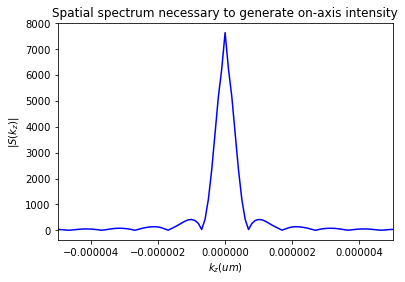

In [5]:
# First what is the spatial spectrum with 0 phase on the entire output
lam = 0.8
k = 2*np.pi/lam

S = fftshift(fft(I))
kz = fftshift(fftfreq(np.size(z), z[1]-z[0]))
#kr = np.sqrt(k**2 - kz**2)
plt.plot(kz, abs(S), 'b-')
plt.xlabel(r'$k_z (um)$')
plt.ylabel(r'$|S(k_z)|$')
plt.title('Spatial spectrum necessary to generate on-axis intensity')
plt.xlim([-5e-6, 5e-6])
plt.show()